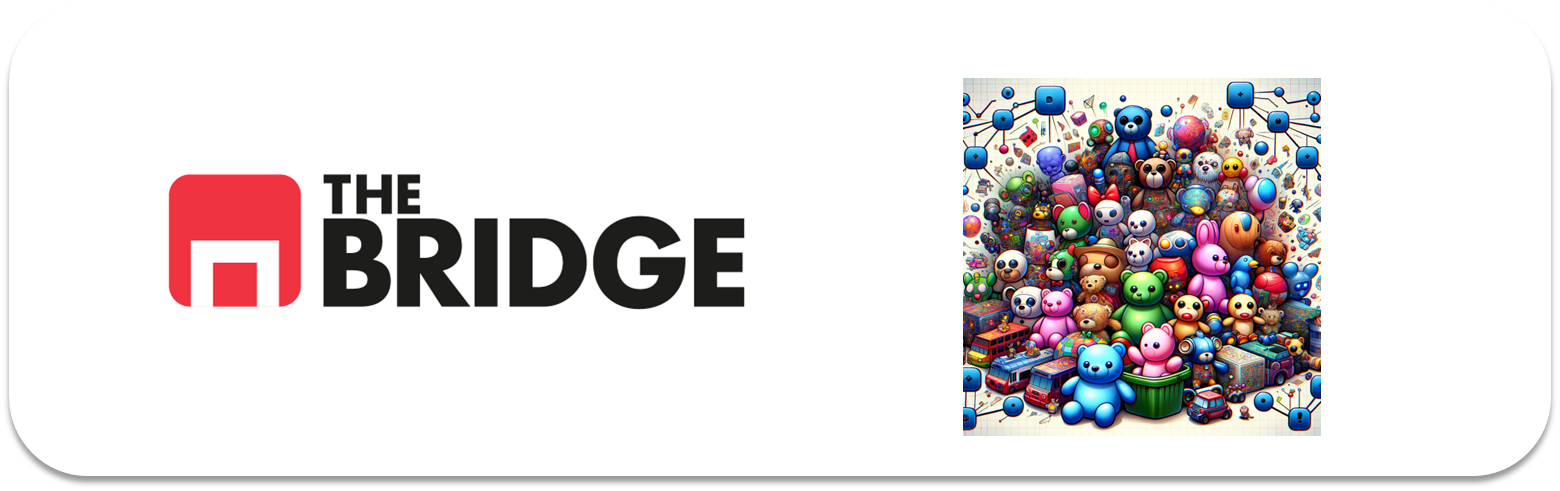

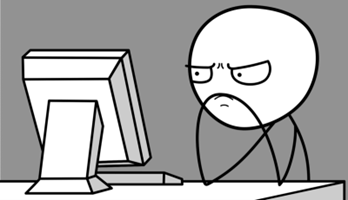

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [149]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from sklearn.decomposition import PCA

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [150]:

olivetti_faces = fetch_olivetti_faces()
print(olivetti_faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [151]:
olivetti_faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [152]:
df = pd.DataFrame(olivetti_faces.data, columns=[f"pixel_{i}" for i in range(4096)])
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4086,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


In [153]:
# [f"pixel_{i}" for i in range(4096)] cambiar el nombre de columnas 

In [154]:
df["target"]= olivetti_faces.target

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 4097 entries, pixel_0 to target
dtypes: float32(4096), int32(1)
memory usage: 6.3 MB


In [156]:
df_reordenado = df.sample(len(df), random_state=42)

In [157]:
df_reordenado.head(5)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,target
209,0.198347,0.235537,0.351240,0.409091,0.421488,0.429752,0.500000,0.528926,0.524793,0.553719,...,0.508264,0.524793,0.504132,0.483471,0.471074,0.285124,0.061983,0.128099,0.090909,20
280,0.185950,0.128099,0.115702,0.132231,0.185950,0.268595,0.433884,0.541322,0.570248,0.586777,...,0.396694,0.409091,0.301653,0.421488,0.462810,0.247934,0.190083,0.210744,0.210744,28
33,0.508264,0.603306,0.619835,0.628099,0.657025,0.665289,0.690083,0.727273,0.743802,0.768595,...,0.301653,0.305785,0.314050,0.326446,0.338843,0.330579,0.334711,0.342975,0.342975,3
210,0.136364,0.140496,0.185950,0.280992,0.318182,0.363636,0.409091,0.417355,0.438017,0.454545,...,0.169421,0.206612,0.276859,0.355372,0.685950,0.661157,0.280992,0.371901,0.276859,21
93,0.652893,0.644628,0.652893,0.706612,0.714876,0.719008,0.743802,0.747934,0.747934,0.756198,...,0.074380,0.074380,0.082645,0.082645,0.111570,0.070248,0.086777,0.185950,0.231405,9


### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es una práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [158]:
# Primer split 90-10
conjunto, test = train_test_split(df, test_size=0.1, stratify=df['target'], random_state=42) # opcion poner en lugar de % podemos poner test_size= 40

# Segundo split 89-11 (para obtener aproximadamente 80-10-10)
train, val = train_test_split(conjunto, test_size=0.11, stratify=conjunto['target'], random_state=42)



In [159]:
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,target
315,0.590909,0.747934,0.826446,0.855372,0.842975,0.826446,0.834711,0.838843,0.814050,0.756198,...,0.206612,0.235537,0.247934,0.280992,0.351240,0.367769,0.301653,0.305785,0.318182,31
240,0.557851,0.628099,0.677686,0.702479,0.710744,0.743802,0.756198,0.764463,0.785124,0.789256,...,0.132231,0.293388,0.322314,0.392562,0.462810,0.475207,0.446281,0.272727,0.392562,24
200,0.516529,0.512397,0.508264,0.516529,0.537190,0.566116,0.561983,0.574380,0.578512,0.582645,...,0.086777,0.099174,0.136364,0.334711,0.520661,0.557851,0.561983,0.557851,0.566116,20
88,0.429752,0.475207,0.520661,0.549587,0.553719,0.586777,0.628099,0.652893,0.669421,0.665289,...,0.342975,0.359504,0.371901,0.338843,0.351240,0.367769,0.355372,0.392562,0.376033,8
161,0.417355,0.483471,0.528926,0.549587,0.570248,0.557851,0.566116,0.590909,0.619835,0.640496,...,0.177686,0.173554,0.169421,0.173554,0.185950,0.173554,0.161157,0.177686,0.169421,16


### #1.4

Crea los pares X,y para train, validation y test.

In [160]:
target = "target"
X_train = train.drop(target, axis = 1)
y_train = train[target]
X_valid = val.drop(target, axis = 1)
y_valid = val[target]
X_test = test.drop(target, axis = 1)
y_test = test[target]

In [161]:
X_train.iloc[0]

pixel_0       0.590909
pixel_1       0.747934
pixel_2       0.826446
pixel_3       0.855372
pixel_4       0.842975
                ...   
pixel_4091    0.351240
pixel_4092    0.367769
pixel_4093    0.301653
pixel_4094    0.305785
pixel_4095    0.318182
Name: 315, Length: 4096, dtype: float32

In [162]:
y_train.iloc[0]

31

Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [163]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray") # funcion para sacar imagenes
        plt.axis("off")
        plt.title(label)
    plt.show()

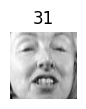

In [164]:
plot_faces((X_train.iloc[0]).values.reshape(1,-1), [y_train.iloc[0]])

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [165]:


pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

222

In [166]:
pd.DataFrame(X_train_pca, columns= [f"feat_new_{i}" for i in range(1,pca.n_components_+1)])

,feat_new_1,feat_new_2,feat_new_3,feat_new_4,feat_new_5,feat_new_6,feat_new_7,feat_new_8,feat_new_9,feat_new_10,...,feat_new_213,feat_new_214,feat_new_215,feat_new_216,feat_new_217,feat_new_218,feat_new_219,feat_new_220,feat_new_221,feat_new_222
0,3.323718,4.729035,-3.871609,-0.639783,1.901199,-1.532653,0.424973,1.344976,0.887482,-1.113693,...,-0.056512,-0.157898,-0.013316,0.044384,-0.204471,-0.224131,-0.046801,0.150182,0.091152,0.028565
1,1.856978,2.465141,2.058208,0.419751,2.102745,1.874075,-0.520903,0.384608,0.719297,-0.025231,...,0.109550,-0.092814,-0.075345,0.014854,0.077748,0.049671,0.005065,-0.098711,-0.014034,-0.047183
2,-5.446839,-0.687871,0.408804,0.866731,1.596934,0.536748,-0.626046,-0.905733,-1.188187,0.399665,...,-0.081653,-0.302065,0.046739,-0.040073,-0.089149,-0.106700,-0.247873,-0.050118,0.106213,0.219054
3,0.326149,-0.592125,2.873903,1.217620,2.468108,1.495593,-1.288161,0.223092,0.056907,-1.717363,...,0.063302,0.020874,0.043911,0.041662,0.093710,0.035914,-0.026677,-0.089311,-0.001253,-0.005417
4,1.267764,-1.657693,4.024519,-0.608780,-0.106605,-0.507364,0.219226,-1.944726,-2.670123,-2.695822,...,0.062769,0.087547,-0.088474,-0.118912,0.105318,0.142415,0.084399,0.038116,-0.012841,0.061950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,-3.390712,-2.620157,6.380286,-1.597573,-1.989761,-2.554477,2.352389,-0.528567,0.545273,-0.294800,...,0.163637,0.230209,0.126838,-0.257388,-0.004850,-0.093778,0.184200,-0.050882,-0.302457,-0.050263
316,1.009888,0.332644,2.523875,1.493679,0.297828,2.073245,-0.641912,-1.581799,-0.573441,-0.236390,...,-0.235872,0.109492,0.193529,0.004704,-0.060910,0.027941,-0.057499,-0.056829,-0.092489,0.038074
317,-5.411438,-3.175685,-0.030380,-0.120280,0.932109,0.398003,-0.673586,-0.421877,-0.197162,0.866583,...,0.106430,-0.123137,0.200002,0.134726,0.114435,-0.172270,0.127150,-0.325636,0.194123,-0.146665
318,-9.112381,-0.337013,-1.098495,0.086418,-2.316254,-2.136501,-0.714311,-0.131563,-0.523070,-0.707856,...,-0.092748,0.001021,-0.041196,-0.062500,0.043103,0.072057,-0.112942,0.151922,-0.059791,-0.281324


### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

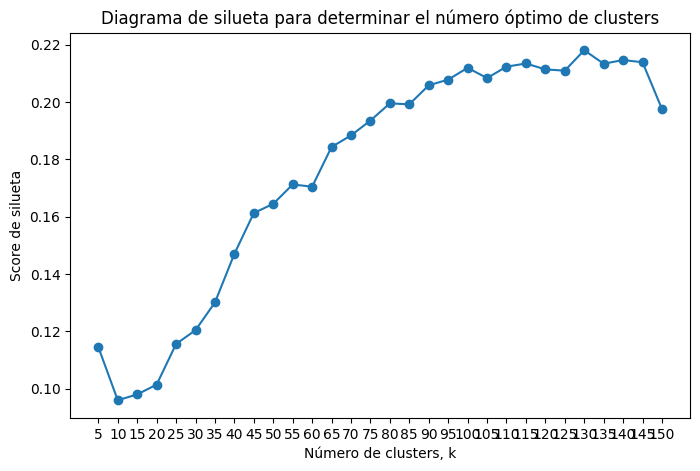

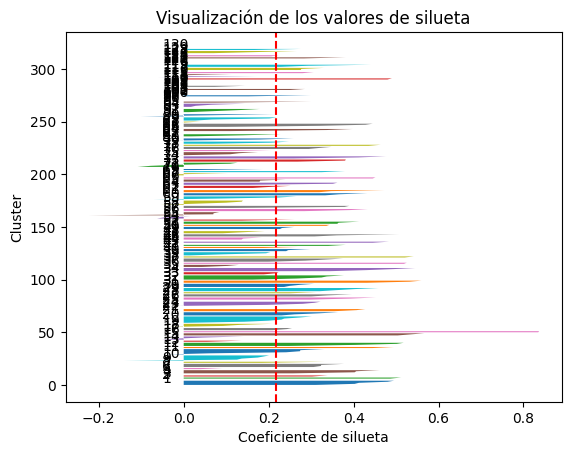

130


In [167]:
# Rango de valores de k para probar
ks = range(5, 151, 5)
silhouette_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_train_pca, labels))

# Gráfico de los scores de silueta para diferentes valores de k
plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_scores, '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Score de silueta')
plt.xticks(ks)
plt.title('Diagrama de silueta para determinar el número óptimo de clusters')
plt.show()

# Opcional: Mostrar los diagramas de silueta para el número óptimo de clusters
optimal_k = ks[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_train_pca)
silhouette_vals = silhouette_samples(X_train_pca, labels)

# Visualización de los valores de silueta para el número óptimo de clusters
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i + 1))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(x=silhouette_score(X_train_pca, labels), color="red", linestyle="--")
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')
plt.title('Visualización de los valores de silueta')
plt.show()

print(optimal_k)



In [168]:
# el mekor k es 130, errror es el 125

In [169]:
# Rango de valores de k para probar
k_range = range(5, 151, 5)
kmeans_per_k = []

for k in k_range:
    print(f"k={k}")
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145
k=150


In [170]:
kmeans_per_k

[KMeans(n_clusters=5, n_init=10, random_state=42),
 KMeans(n_clusters=10, n_init=10, random_state=42),
 KMeans(n_clusters=15, n_init=10, random_state=42),
 KMeans(n_clusters=20, n_init=10, random_state=42),
 KMeans(n_clusters=25, n_init=10, random_state=42),
 KMeans(n_clusters=30, n_init=10, random_state=42),
 KMeans(n_clusters=35, n_init=10, random_state=42),
 KMeans(n_clusters=40, n_init=10, random_state=42),
 KMeans(n_clusters=45, n_init=10, random_state=42),
 KMeans(n_clusters=50, n_init=10, random_state=42),
 KMeans(n_clusters=55, n_init=10, random_state=42),
 KMeans(n_clusters=60, n_init=10, random_state=42),
 KMeans(n_clusters=65, n_init=10, random_state=42),
 KMeans(n_clusters=70, n_init=10, random_state=42),
 KMeans(n_clusters=75, n_init=10, random_state=42),
 KMeans(n_clusters=80, n_init=10, random_state=42),
 KMeans(n_clusters=85, n_init=10, random_state=42),
 KMeans(n_clusters=90, n_init=10, random_state=42),
 KMeans(n_clusters=95, n_init=10, random_state=42),
 KMeans(n_clu

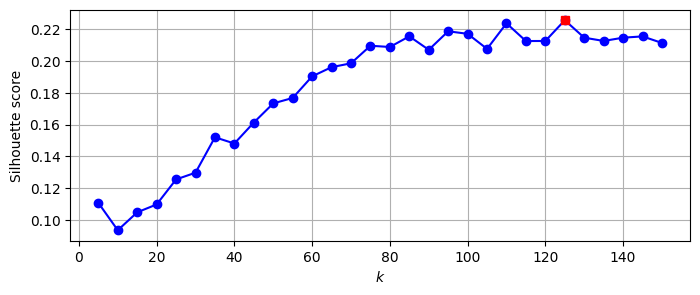

In [171]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index] # Esto para pintarlo 
best_score = silhouette_scores[best_index] # equivalente a max(silhouette_scores)
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

In [172]:
print(best_k) 

125


### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

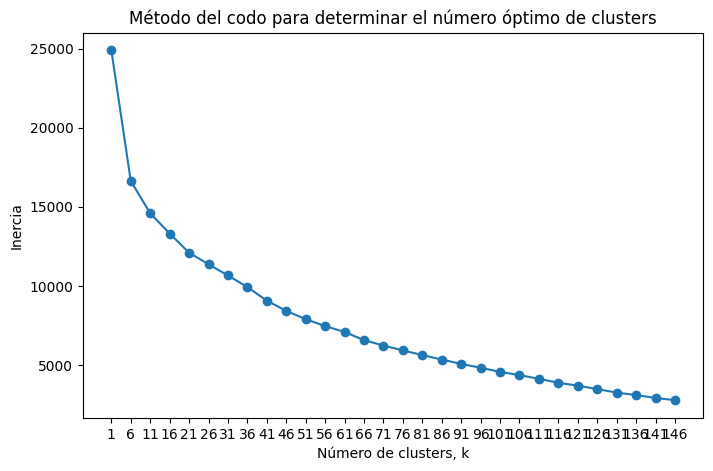

In [173]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Rango de valores de k para probar
ks = range(1, 150, 5)
inertias = []

for k in ks:
    # Creación y ajuste de KMeans para cada valor de k
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_train_pca)
    # Almacenamiento de la inercia en la lista
    inertias.append(model.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inercia')
plt.xticks(ks)
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [174]:
from sklearn.cluster import KMeans

# Creación de una instancia de KMeans
best_model = KMeans(n_clusters=125, random_state=42)

# Ajuste del modelo a los datos
best_model.fit(X_train_pca)



KMeans(n_clusters=125, random_state=42)

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

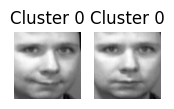

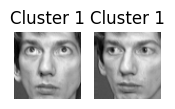

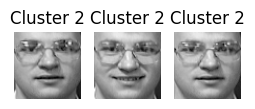

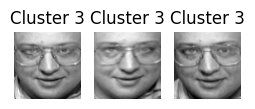

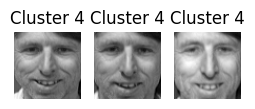

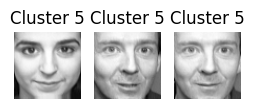

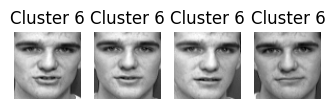

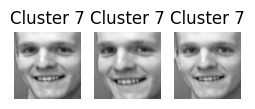

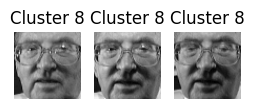

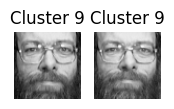

In [175]:
# Supongamos que kmeans es tu modelo de clustering ya entrenado y X_train_pca son tus datos transformados
labels_pred = kmeans.predict(X_train_pca)



# Visualizar las caras asignadas a los primeros 10 clústeres
for i in range(10):
    # Seleccionar las imágenes correspondientes al clúster actual
    cluster_faces = X_train.iloc[labels_pred == i].values
    # Visualizar las caras del clúster
    plot_faces(cluster_faces, [f"Cluster {i}"] * len(cluster_faces))




   

Cluster 0


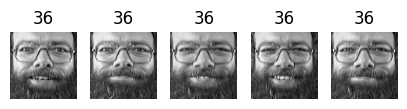

Cluster 1


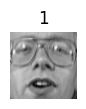

Cluster 2


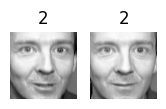

Cluster 3


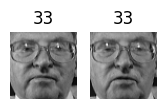

Cluster 4


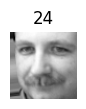

Cluster 5


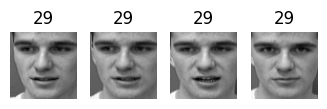

Cluster 6


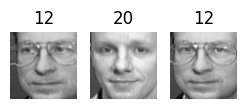

Cluster 7


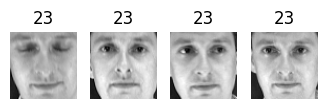

Cluster 8


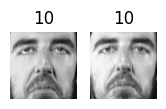

Cluster 9


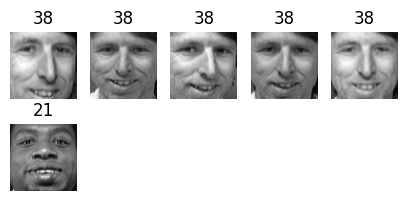

Cluster 10


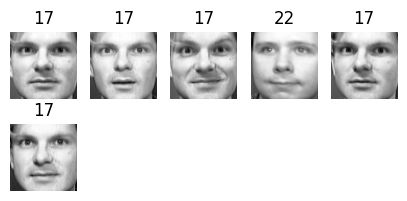

Cluster 11


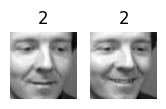

Cluster 12


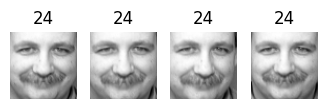

Cluster 13


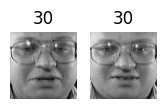

Cluster 14


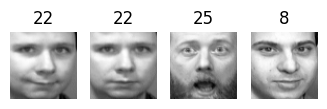

Cluster 15


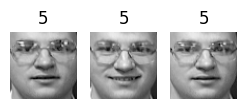

Cluster 16


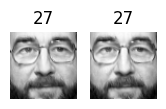

Cluster 17


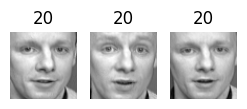

Cluster 18


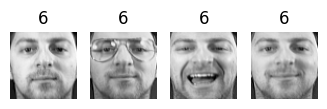

Cluster 19


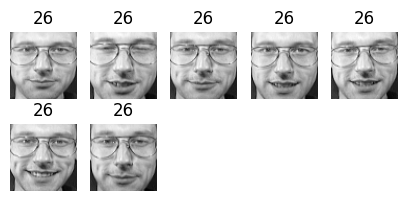

Cluster 20


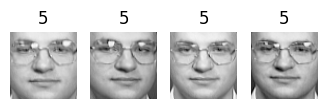

Cluster 21


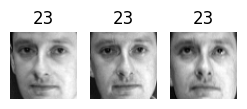

Cluster 22


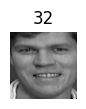

Cluster 23


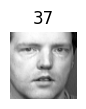

Cluster 24


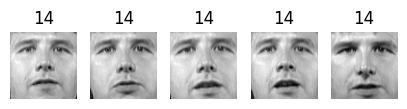

Cluster 25


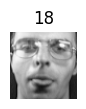

Cluster 26


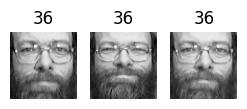

Cluster 27


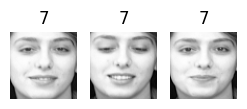

Cluster 28


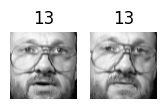

Cluster 29


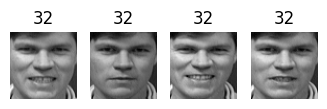

In [181]:
# la propuesta de Rodrigo:
for cluster_id in np.unique(best_model.labels_)[0:30]:
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].values
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [184]:
from sklearn.ensemble import RandomForestClassifier # Y para regresión, el proceso es similar pero utilizando 'RandomForestRegressor'.

# Instanciar y entrenar el modelo
modelo = RandomForestClassifier(n_estimators=150)
modelo.fit(X_train, y_train)

# Hacer predicciones
labels_pred_rf = modelo.predict(X_valid)


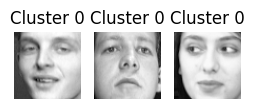

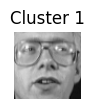

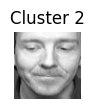

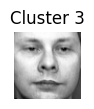

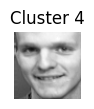

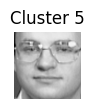

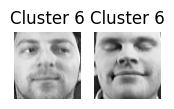

<Figure size 500x0 with 0 Axes>

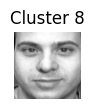

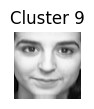

In [177]:
# Visualizar las caras asignadas a los primeros 10 clústeres
for i in range(10):
    # Seleccionar las imágenes correspondientes al clúster actual
    cluster_faces = X_valid.iloc[labels_pred_rf == i].values
    # Visualizar las caras del clúster
    plot_faces(cluster_faces, [f"Cluster {i}"] * len(cluster_faces))


### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [178]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

In [185]:
# Entrenar un clasificador RandomForest sobre el conjunto reducido
rf_clf = RandomForestClassifier(n_estimators=125, random_state=42)
rf_clf.fit(X_train_reduced, y_train)

# Evaluar el clasificador en el conjunto de validación
y_valid_pred = rf_clf.predict(X_valid_reduced)
val_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Precisión en el conjunto de validación: {val_accuracy:.2f}')

Precisión en el conjunto de validación: 0.78


### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)